In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
import umap
import hdbscan

C:\Users\Lukasz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Wczytanie danych

In [2]:
real_data = pd.read_csv('../../../classifier_data/OC_test.csv', sep='\t')
real_data = real_data.T
synthetic_data_path = '../../../best_models/OC/GAN/50/synthetic_data/'
#get all folders names in synthetic_data_path
model_id = os.listdir(synthetic_data_path)[0]

synthetic_data = pd.read_csv(f'{synthetic_data_path}/{model_id}/generated_data.tsv', sep='\t')

In [3]:
# keep only the columns that are in both datasets
# Znalezienie wspólnych kolumn
common_columns = real_data.columns.intersection(synthetic_data.columns)

# Uporządkowanie kolumn w real_data
real_data = real_data[common_columns]

# Uporządkowanie kolumn w synthetic_data
synthetic_data = synthetic_data[common_columns]
# synthetic_data = real_data
# # # # add noise to synthetic data
# synthetic_data = synthetic_data + np.random.normal(0, 0.001, synthetic_data.shape)

In [4]:
real_data.describe()

,ENSG00000013441,ENSG00000019582,ENSG00000028137,ENSG00000044574,ENSG00000054654,ENSG00000076928,ENSG00000081237,ENSG00000085265,ENSG00000090382,ENSG00000100906,...,ENSG00000177359,ENSG00000184319,ENSG00000196126,ENSG00000196565,ENSG00000198336,ENSG00000211899,ENSG00000240356,ENSG00000244734,ENSG00000257207,ENSG00000269028
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,...,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,5.383295,7.926671,4.400608,5.454685,5.468927,5.737506,6.810340,5.303941,5.604807,6.563085,...,6.108211,5.692259,5.034759,4.890230,4.076677,5.025310,6.467080,9.807952,7.183534,6.230360
std,1.351099,1.228447,1.310490,1.766246,1.603093,1.475025,1.678990,1.634166,1.459356,1.829450,...,1.670961,1.539079,1.153851,1.410989,1.538983,1.206497,1.834875,1.955772,2.309498,1.589146
min,3.083092,6.357698,3.083092,3.083092,3.083092,3.083092,3.909205,3.083092,3.083092,4.110543,...,3.083092,3.083092,3.559858,3.083092,3.083092,3.083092,3.083092,5.411467,3.083092,3.083092
25%,4.387843,7.054008,3.083092,4.326989,4.472622,4.728522,5.819355,4.133295,4.728308,4.879727,...,4.988826,4.044942,4.216033,3.793391,3.083092,4.338229,4.390245,8.225963,3.938748,5.102845
50%,5.131681,7.620259,4.191458,5.033278,5.135979,5.566490,6.394992,4.851165,5.329541,6.134013,...,6.049849,6.400671,4.690987,4.717973,3.703942,4.723519,7.309190,10.138356,8.109635,6.236222
75%,6.280473,8.729870,4.918147,6.040519,6.316825,6.540506,8.030359,6.277556,6.086549,7.823459,...,7.531868,6.934258,5.469025,5.743390,4.021908,5.576604,8.021807,11.341351,8.775656,7.490489
max,8.244734,11.118185,7.953352,10.151589,9.389087,9.974393,11.238189,9.588953,10.476126,10.632605,...,8.734310,7.866004,8.588439,8.418315,9.260708,8.187289,8.871481,13.361940,10.710225,9.650323


In [5]:
synthetic_data.describe()

,ENSG00000013441,ENSG00000019582,ENSG00000028137,ENSG00000044574,ENSG00000054654,ENSG00000076928,ENSG00000081237,ENSG00000085265,ENSG00000090382,ENSG00000100906,...,ENSG00000177359,ENSG00000184319,ENSG00000196126,ENSG00000196565,ENSG00000198336,ENSG00000211899,ENSG00000240356,ENSG00000244734,ENSG00000257207,ENSG00000269028
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,...,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,5.538555,7.787785,4.512035,5.722855,5.597609,5.939299,6.986441,5.546150,5.460928,6.736896,...,5.965709,5.981427,5.239547,4.640160,4.568373,5.110879,6.699885,9.628637,7.200095,6.067951
std,1.295187,1.204680,1.343607,1.745951,1.472702,1.348949,1.628911,1.685089,1.670258,1.700712,...,1.928602,1.289757,1.369630,1.091428,1.766111,1.296659,1.592076,2.137039,2.375050,1.189305
min,3.188575,6.015972,3.083442,3.209511,3.120402,3.835602,4.180471,3.204542,3.410431,3.653596,...,3.404526,3.466881,3.141039,3.152392,3.083428,3.342613,3.596777,5.430204,3.114543,3.644088
25%,4.535761,6.809984,3.274342,4.270712,4.326825,4.911754,5.449941,4.200975,4.330475,5.215012,...,4.475614,5.117855,4.120177,3.898531,3.340124,4.074942,5.384093,7.877243,5.305109,5.243102
50%,5.292669,7.426757,4.420173,5.437436,5.628206,5.564719,6.802916,5.110001,4.976952,6.671833,...,5.497755,6.099778,5.066392,4.364321,3.859571,4.789714,6.867314,9.397543,7.339514,5.956712
75%,6.560707,8.589472,5.461080,6.835161,6.766337,7.107835,8.446266,6.664509,6.021575,8.040930,...,6.563896,6.901315,6.036560,5.275924,5.358590,5.946886,7.932988,11.278729,9.243864,6.959607
max,8.436079,11.488276,7.888640,10.810495,8.475697,9.930010,10.768133,9.806791,10.678623,10.186419,...,11.632443,8.881643,8.855612,8.182249,11.694033,8.425472,10.371489,13.510123,11.585056,8.772699


### Porównanie rozkładów danych rzeczywistych i syntetycznych

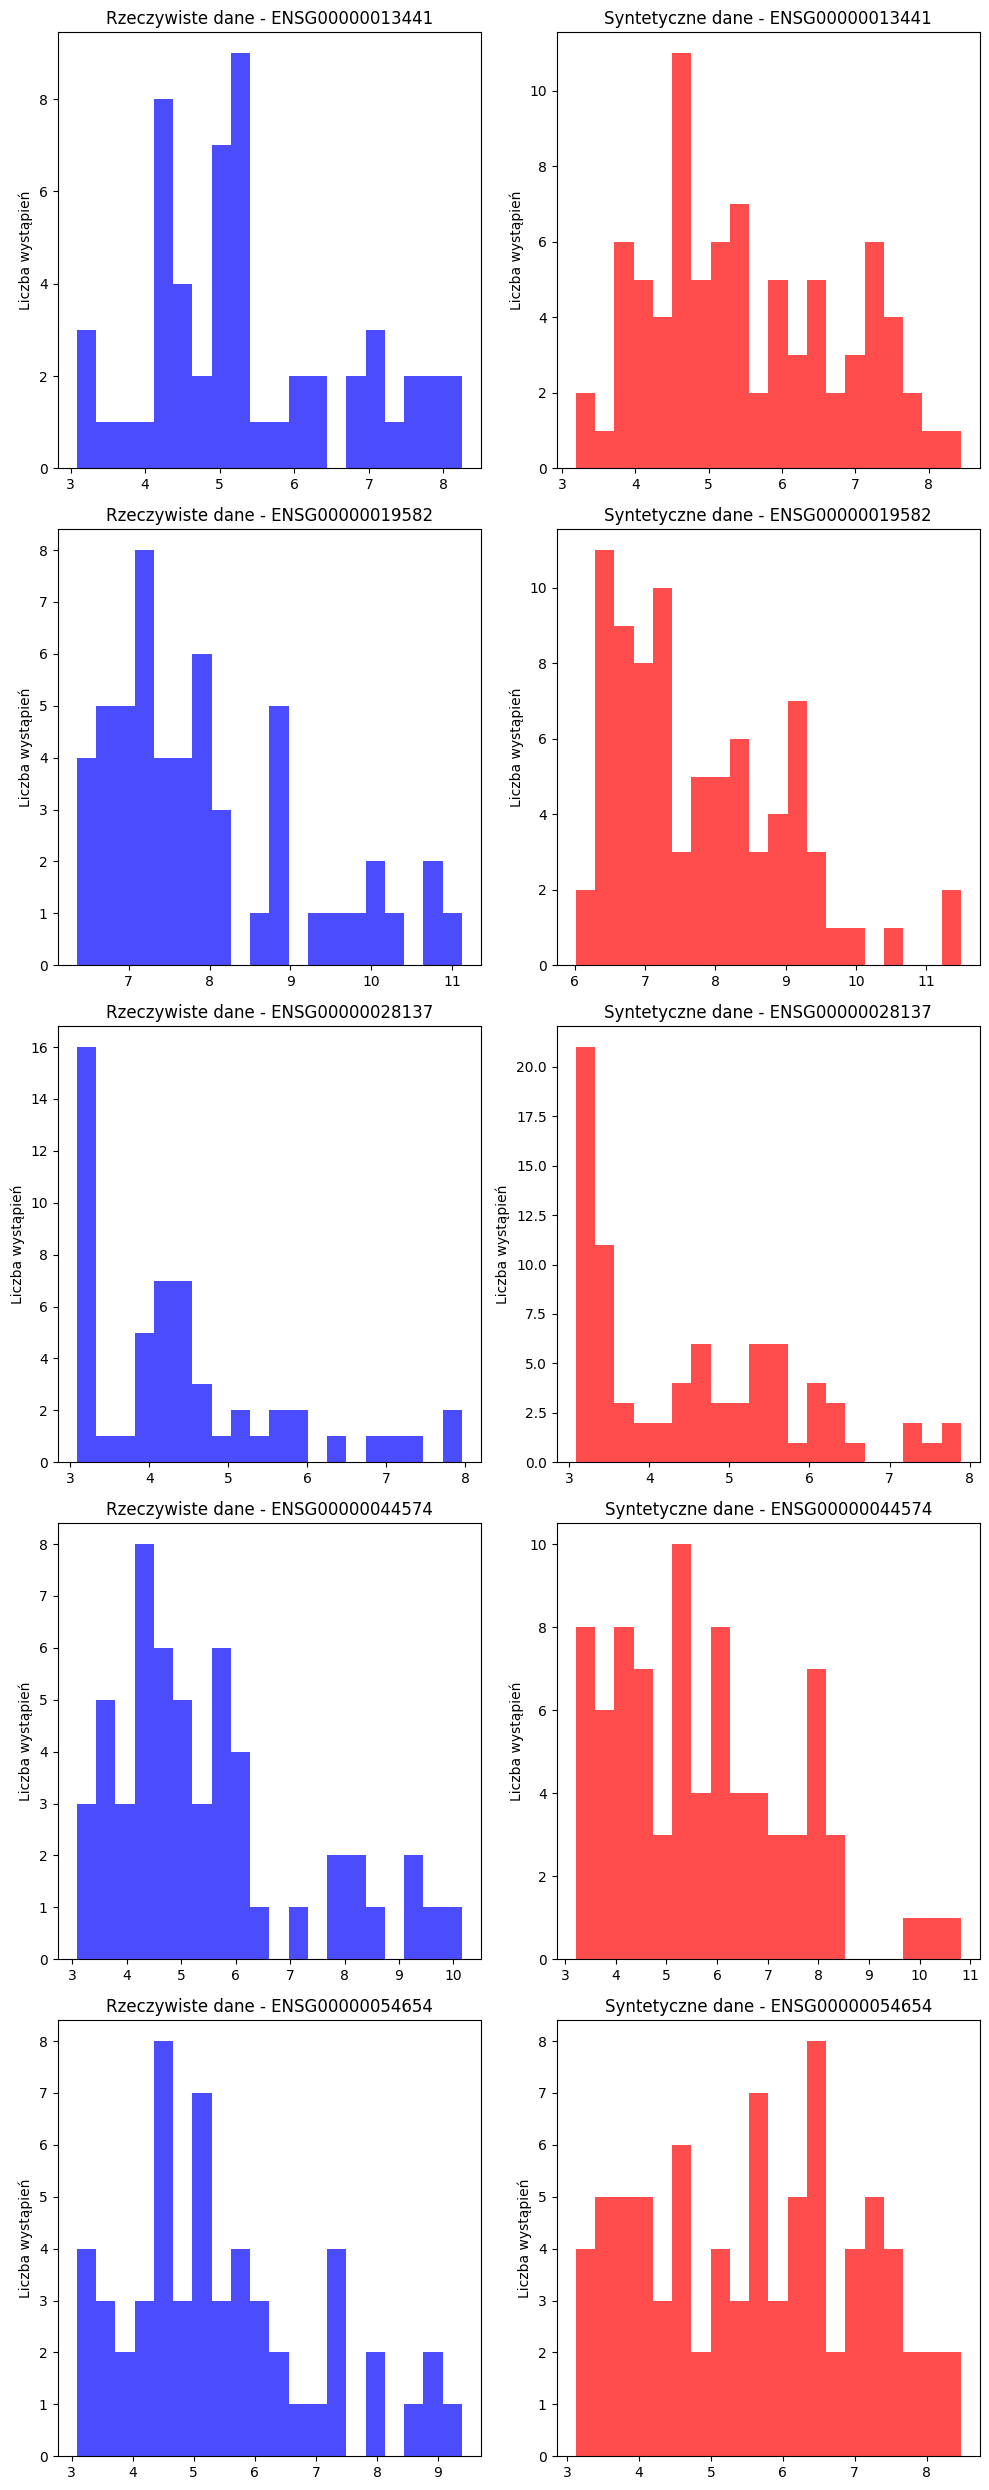

In [6]:
def compare_distributions(real_data, synthetic_data, n_columns=5):
    fig, axes = plt.subplots(nrows=n_columns, ncols=2, figsize=(10, 5*n_columns))
    for i, column in enumerate(real_data.columns):
        if i == n_columns:
            break
        # Histogram dla danych rzeczywistych
        axes[i, 0].hist(real_data[column], bins=20, color='blue', alpha=0.7)
        axes[i, 0].set_title(f'Rzeczywiste dane - {column}')
        axes[i, 0].set_ylabel('Liczba wystąpień')
        
        # Histogram dla danych syntetycznych
        axes[i, 1].hist(synthetic_data[column], bins=20, color='red', alpha=0.7)
        axes[i, 1].set_title(f'Syntetyczne dane - {column}')
        axes[i, 1].set_ylabel('Liczba wystąpień')
        
    plt.tight_layout()
    plt.show()

compare_distributions(real_data, synthetic_data)

### Wykorzystanie PCA do wizualizacji różnorodności danych

Wyjaśniona wariancja przez pierwsze 2 komponenty: 0.6261392844831916


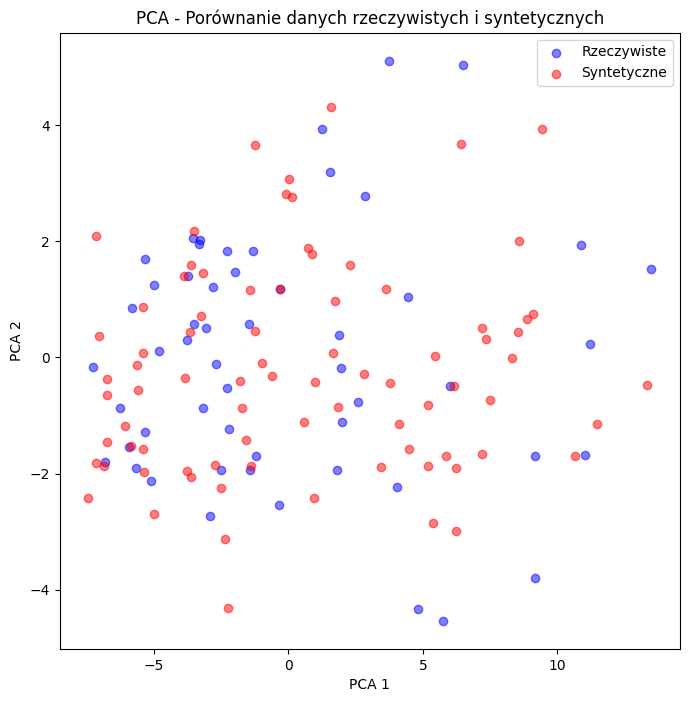

In [7]:
def pca_visualization(real_data, synthetic_data):
    # Standaryzacja danych
    scaler = StandardScaler()
    real_scaled = scaler.fit_transform(real_data)
    synthetic_scaled = scaler.transform(synthetic_data)
    # PCA do 2 komponentów
    pca = PCA(n_components=2, random_state=42)
    real_pca = pca.fit_transform(real_scaled)
    synthetic_pca = pca.transform(synthetic_scaled)
    
    print(f"Wyjaśniona wariancja przez pierwsze 2 komponenty: {np.sum(pca.explained_variance_ratio_)}")

    # Wizualizacja
    plt.figure(figsize=(8, 8))
    plt.scatter(real_pca[:, 0], real_pca[:, 1], c='blue', alpha=0.5, label='Rzeczywiste')
    plt.scatter(synthetic_pca[:, 0], synthetic_pca[:, 1], c='red', alpha=0.5, label='Syntetyczne')
    plt.legend()
    plt.title('PCA - Porównanie danych rzeczywistych i syntetycznych')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

pca_visualization(real_data, synthetic_data)

### Zdefiniowanie metryk odległości

In [8]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

def pearson_distance(x, y):
    corr, _ = pearsonr(x, y)
    return 1 - corr

def spearman_distance(x, y):
    corr, _ = spearmanr(x, y)
    return 1 - corr

### Wykorzystanie TSNE do wizualizacji różnorodności danych

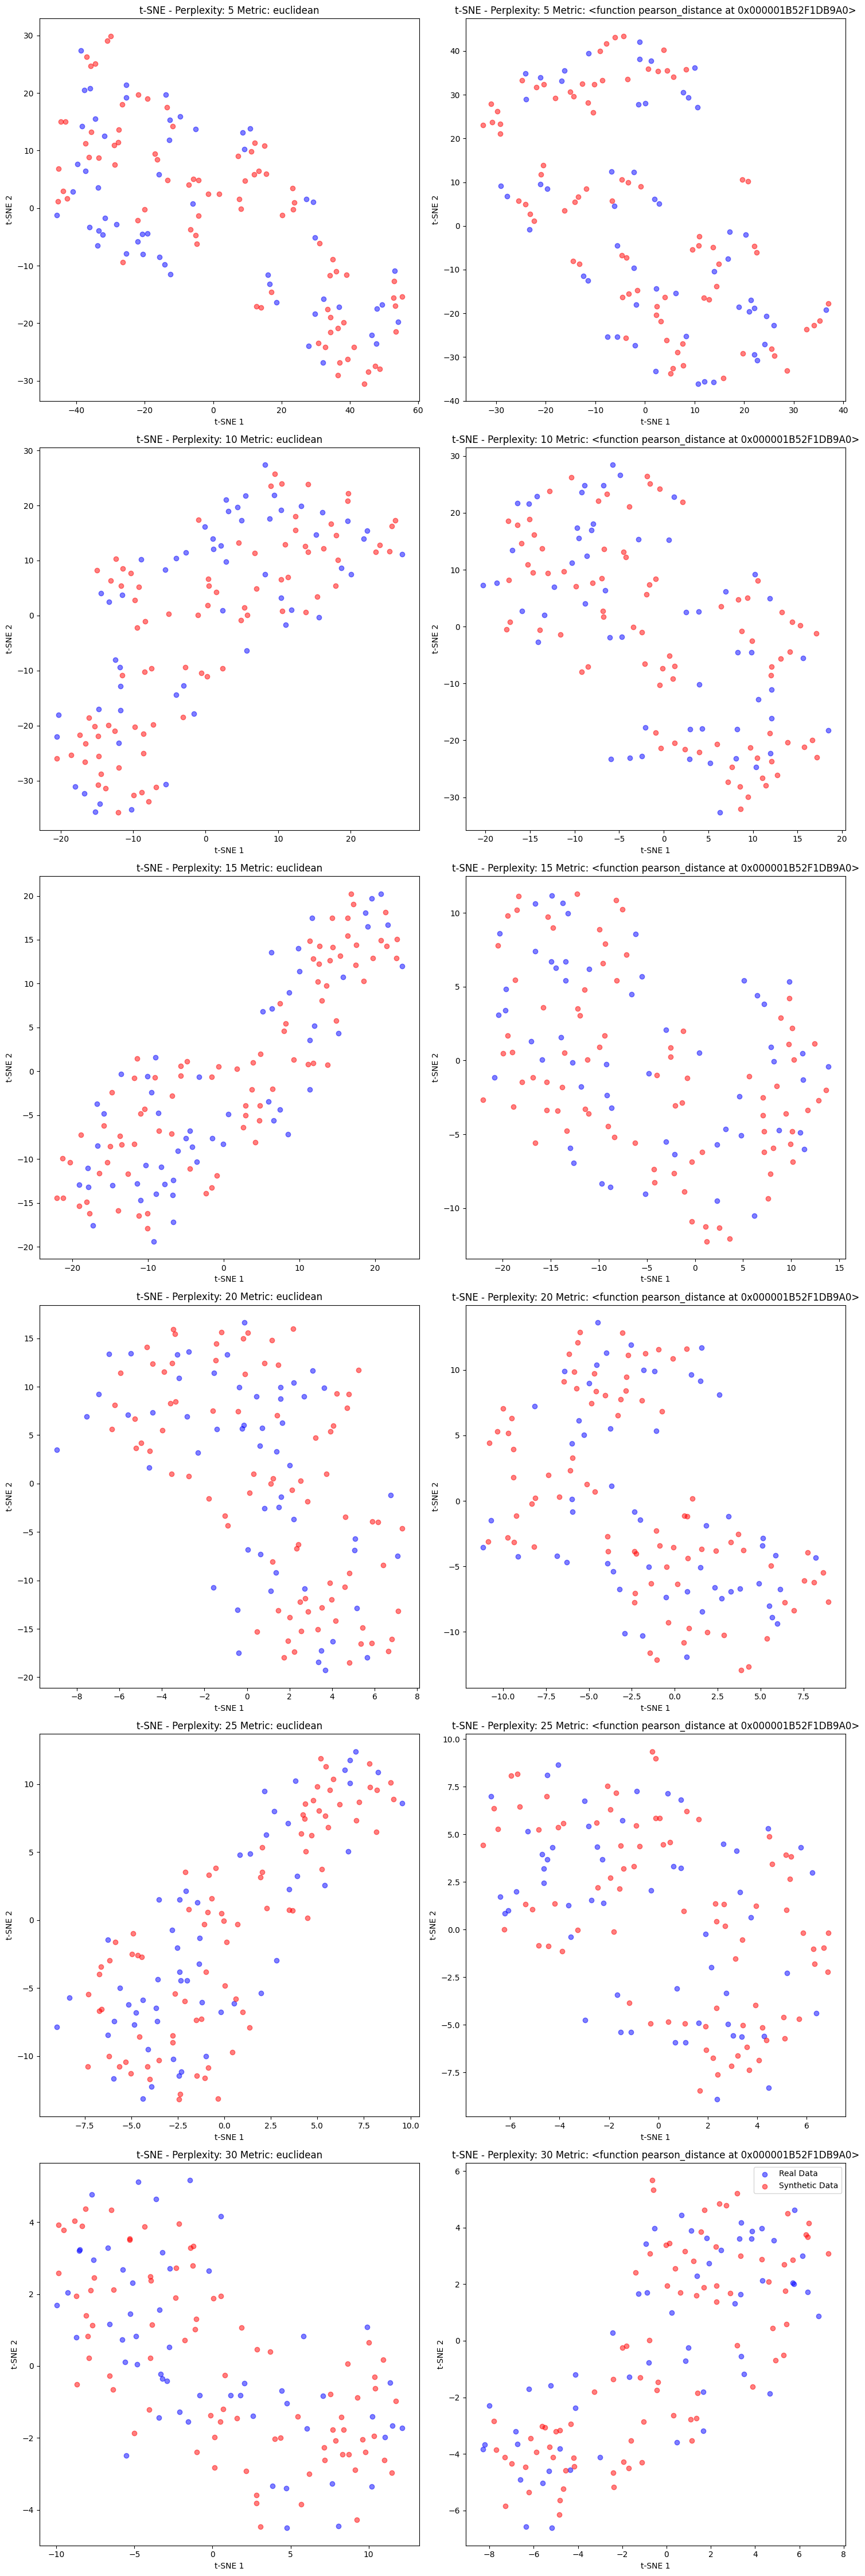

In [9]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def tsne_visualization(real_data, synthetic_data, perplexity, metric, ax):
    # Połączenie danych rzeczywistych i syntetycznych
    combined_data = np.vstack((real_data, synthetic_data))

    # Standaryzacja połączonych danych
    scaler = StandardScaler()
    combined_scaled = scaler.fit_transform(combined_data)

    # PCA do redukcji wymiarowości przed t-SNE
    # pca = PCA(n_components=25)  # Przyjęto 50 komponentów dla przykładu
    # combined_pca = pca.fit_transform(combined_scaled)

    # t-SNE do 2 komponentów
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity, metric=metric)
    combined_tsne = tsne.fit_transform(combined_scaled)

    # Oddzielenie danych rzeczywistych i syntetycznych po t-SNE
    real_tsne = combined_tsne[:len(real_data), :]
    synthetic_tsne = combined_tsne[len(real_data):, :]

    # Wizualizacja
    ax.scatter(real_tsne[:, 0], real_tsne[:, 1], c='blue', alpha=0.5, label='Real Data')
    ax.scatter(synthetic_tsne[:, 0], synthetic_tsne[:, 1], c='red', alpha=0.5, label='Synthetic Data')
    ax.set_title(f't-SNE - Perplexity: {perplexity} Metric: {metric}')
    ax.set_xlabel('t-SNE 1')
    ax.set_ylabel('t-SNE 2')

# Utwórz figurę z wieloma wykresami
fig, axs = plt.subplots(6, 2, figsize=(15, 45)) # Dostosuj rozmiar według potrzeb

# plot for different perplexity values in 6x2 grid (5, 10, 15, 20, 25, 30)
for i, perplexity in enumerate([5, 10, 15, 20, 25, 30]):
    for j, metric in enumerate(["euclidean", pearson_distance]):
        ax = axs[i, j]  # Przeliczenie odpowiedniego indeksu
        tsne_visualization(real_data, synthetic_data, perplexity, metric, ax)

plt.tight_layout()
plt.legend()
plt.show()


### Wykorzystanie UMAP do wizualizacji różnorodności danych

C:\Users\Lukasz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Lukasz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\umap\umap_.py:1849: UserWarning: custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method, define a distance function that returns a tuple of (distance [float], gradient [np.array])
  warn(
C:\Users\Lukasz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. U

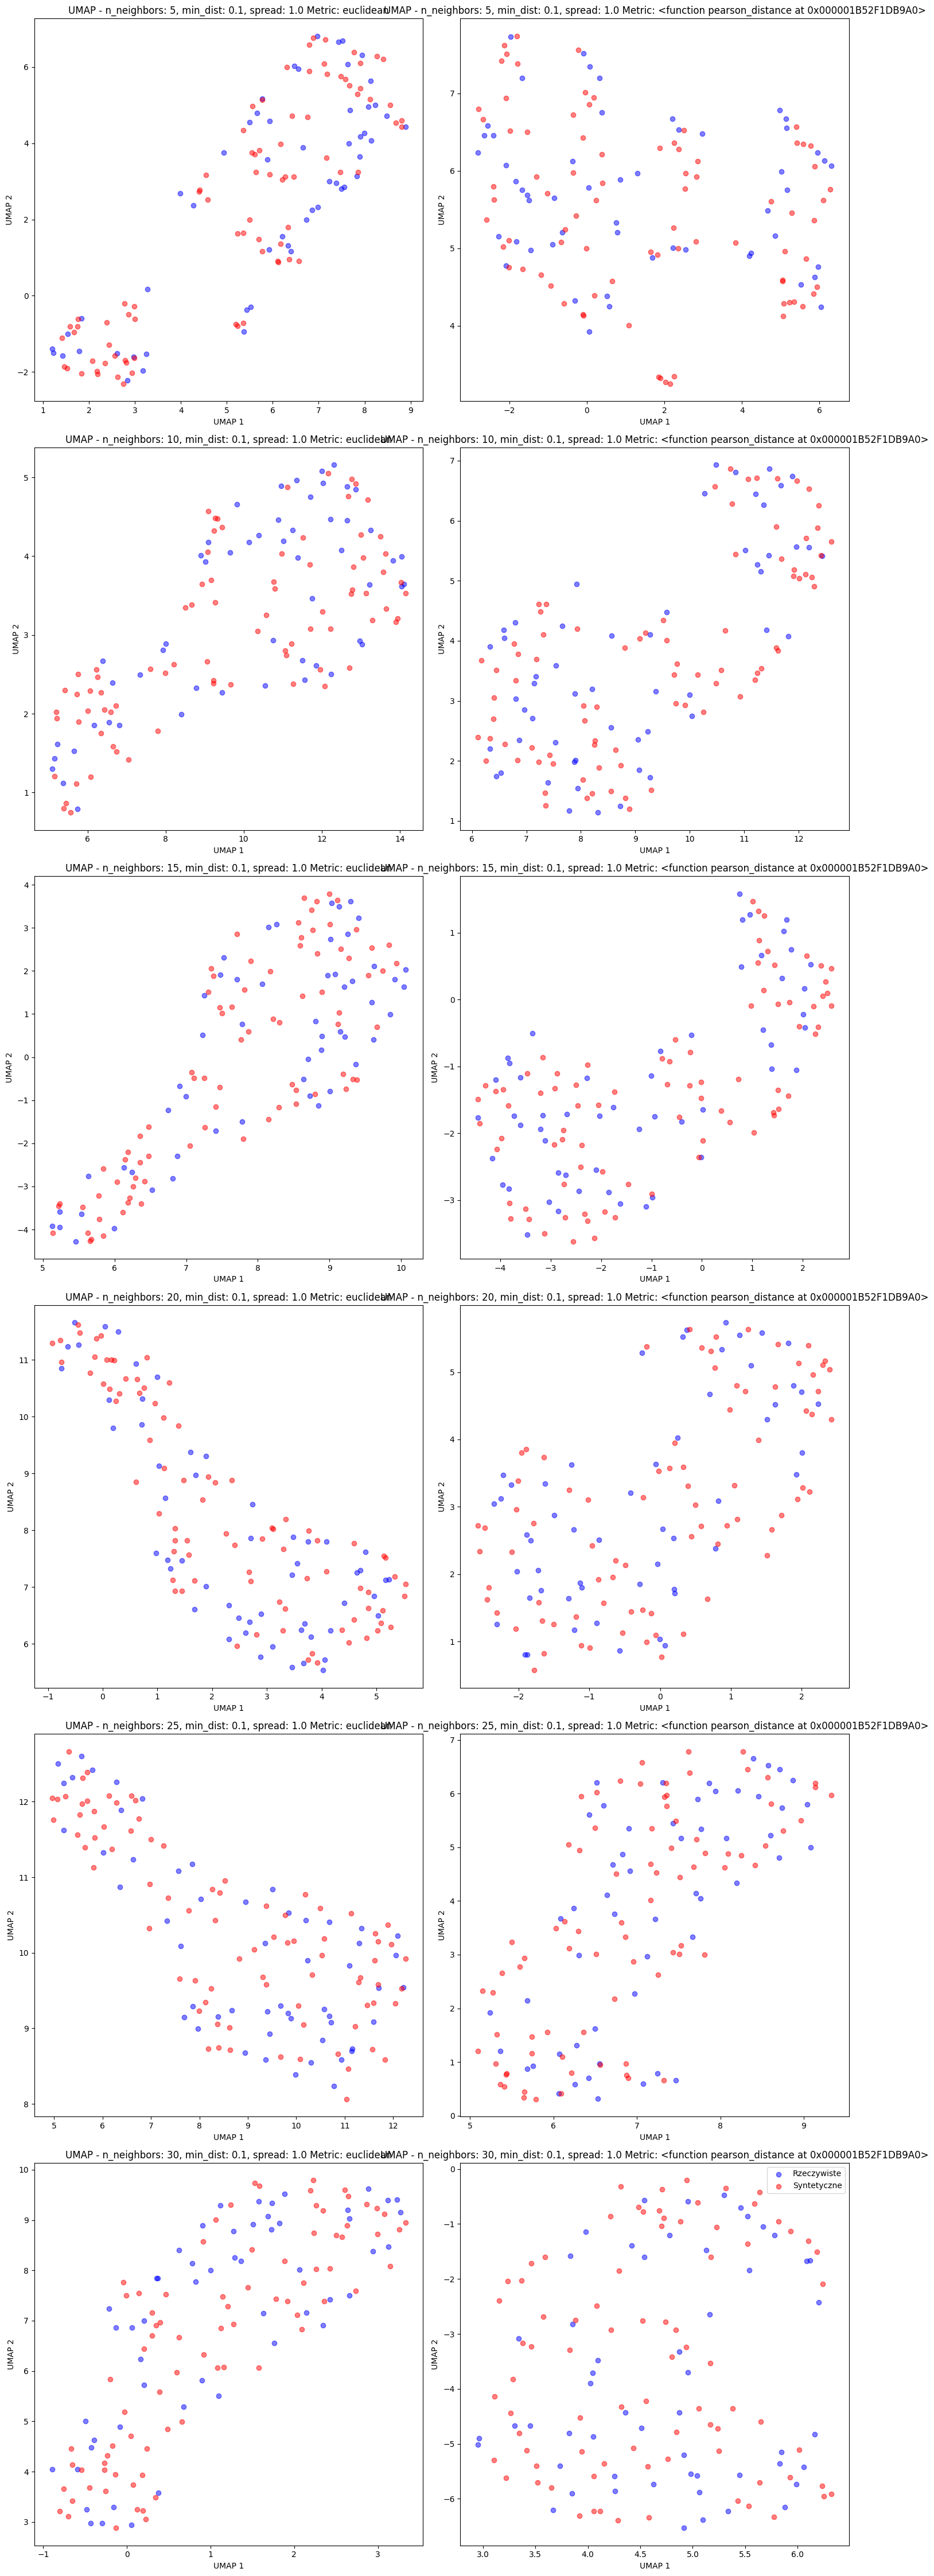

In [10]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from umap.umap_ import UMAP
import numpy as np

def umap_visualization(real_data, synthetic_data, n_neighbors, min_dist, spread, metric, ax):
    # Połączenie danych rzeczywistych i syntetycznych
    combined_data = np.vstack((real_data, synthetic_data))

    # Standaryzacja połączonych danych
    scaler = StandardScaler()
    combined_scaled = scaler.fit_transform(combined_data)

    # PCA do 2 komponentów
    # pca = PCA(n_components=50)
    # combined_pca = pca.fit_transform(combined_scaled)

    # UMAP do 2 komponentów
    umap = UMAP(n_components=2, random_state=42, n_neighbors=n_neighbors, min_dist=min_dist, spread=spread, metric=metric)
    combined_umap = umap.fit_transform(combined_scaled)

    # Oddzielenie danych rzeczywistych i syntetycznych po UMAP
    real_umap = combined_umap[:len(real_data), :]
    synthetic_umap = combined_umap[len(real_data):, :]

    # Wizualizacja
    ax.scatter(real_umap[:, 0], real_umap[:, 1], c='blue', alpha=0.5, label='Rzeczywiste')
    ax.scatter(synthetic_umap[:, 0], synthetic_umap[:, 1], c='red', alpha=0.5, label='Syntetyczne')
    ax.set_title(f'UMAP - n_neighbors: {n_neighbors}, min_dist: {min_dist}, spread: {spread} Metric: {metric}')
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')

# Utwórz figurę z wieloma wykresami
fig, axs = plt.subplots(6, 2, figsize=(15, 45)) # Dostosuj rozmiar według potrzeb

# Ustawienia różnych parametrów UMAP
params = [(5, 0.1, 1.0), (10, 0.1, 1.0), (15, 0.1, 1.0), (20, 0.1, 1.0), (25, 0.1, 1.0), (30, 0.1, 1.0)]

for i, (n_neighbors, min_dist, spread) in enumerate(params):
    for j, metric in enumerate(["euclidean", pearson_distance]):
        ax = axs[i, j]  # Przeliczenie odpowiedniego indeksu
        umap_visualization(real_data, synthetic_data, n_neighbors, min_dist, spread, metric, ax)

plt.tight_layout()
plt.legend()
plt.show()


### Wykorzystanie DBSCAN do wizualizacji różnorodności danych

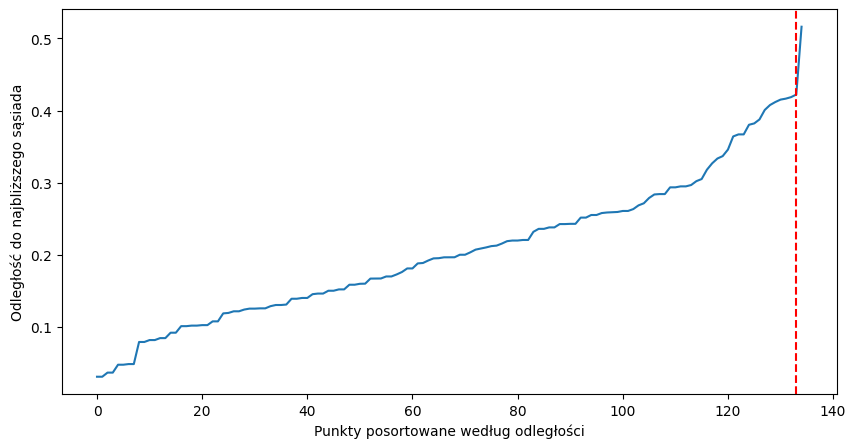

Zalecana wartość eps: 0.42221346259377585


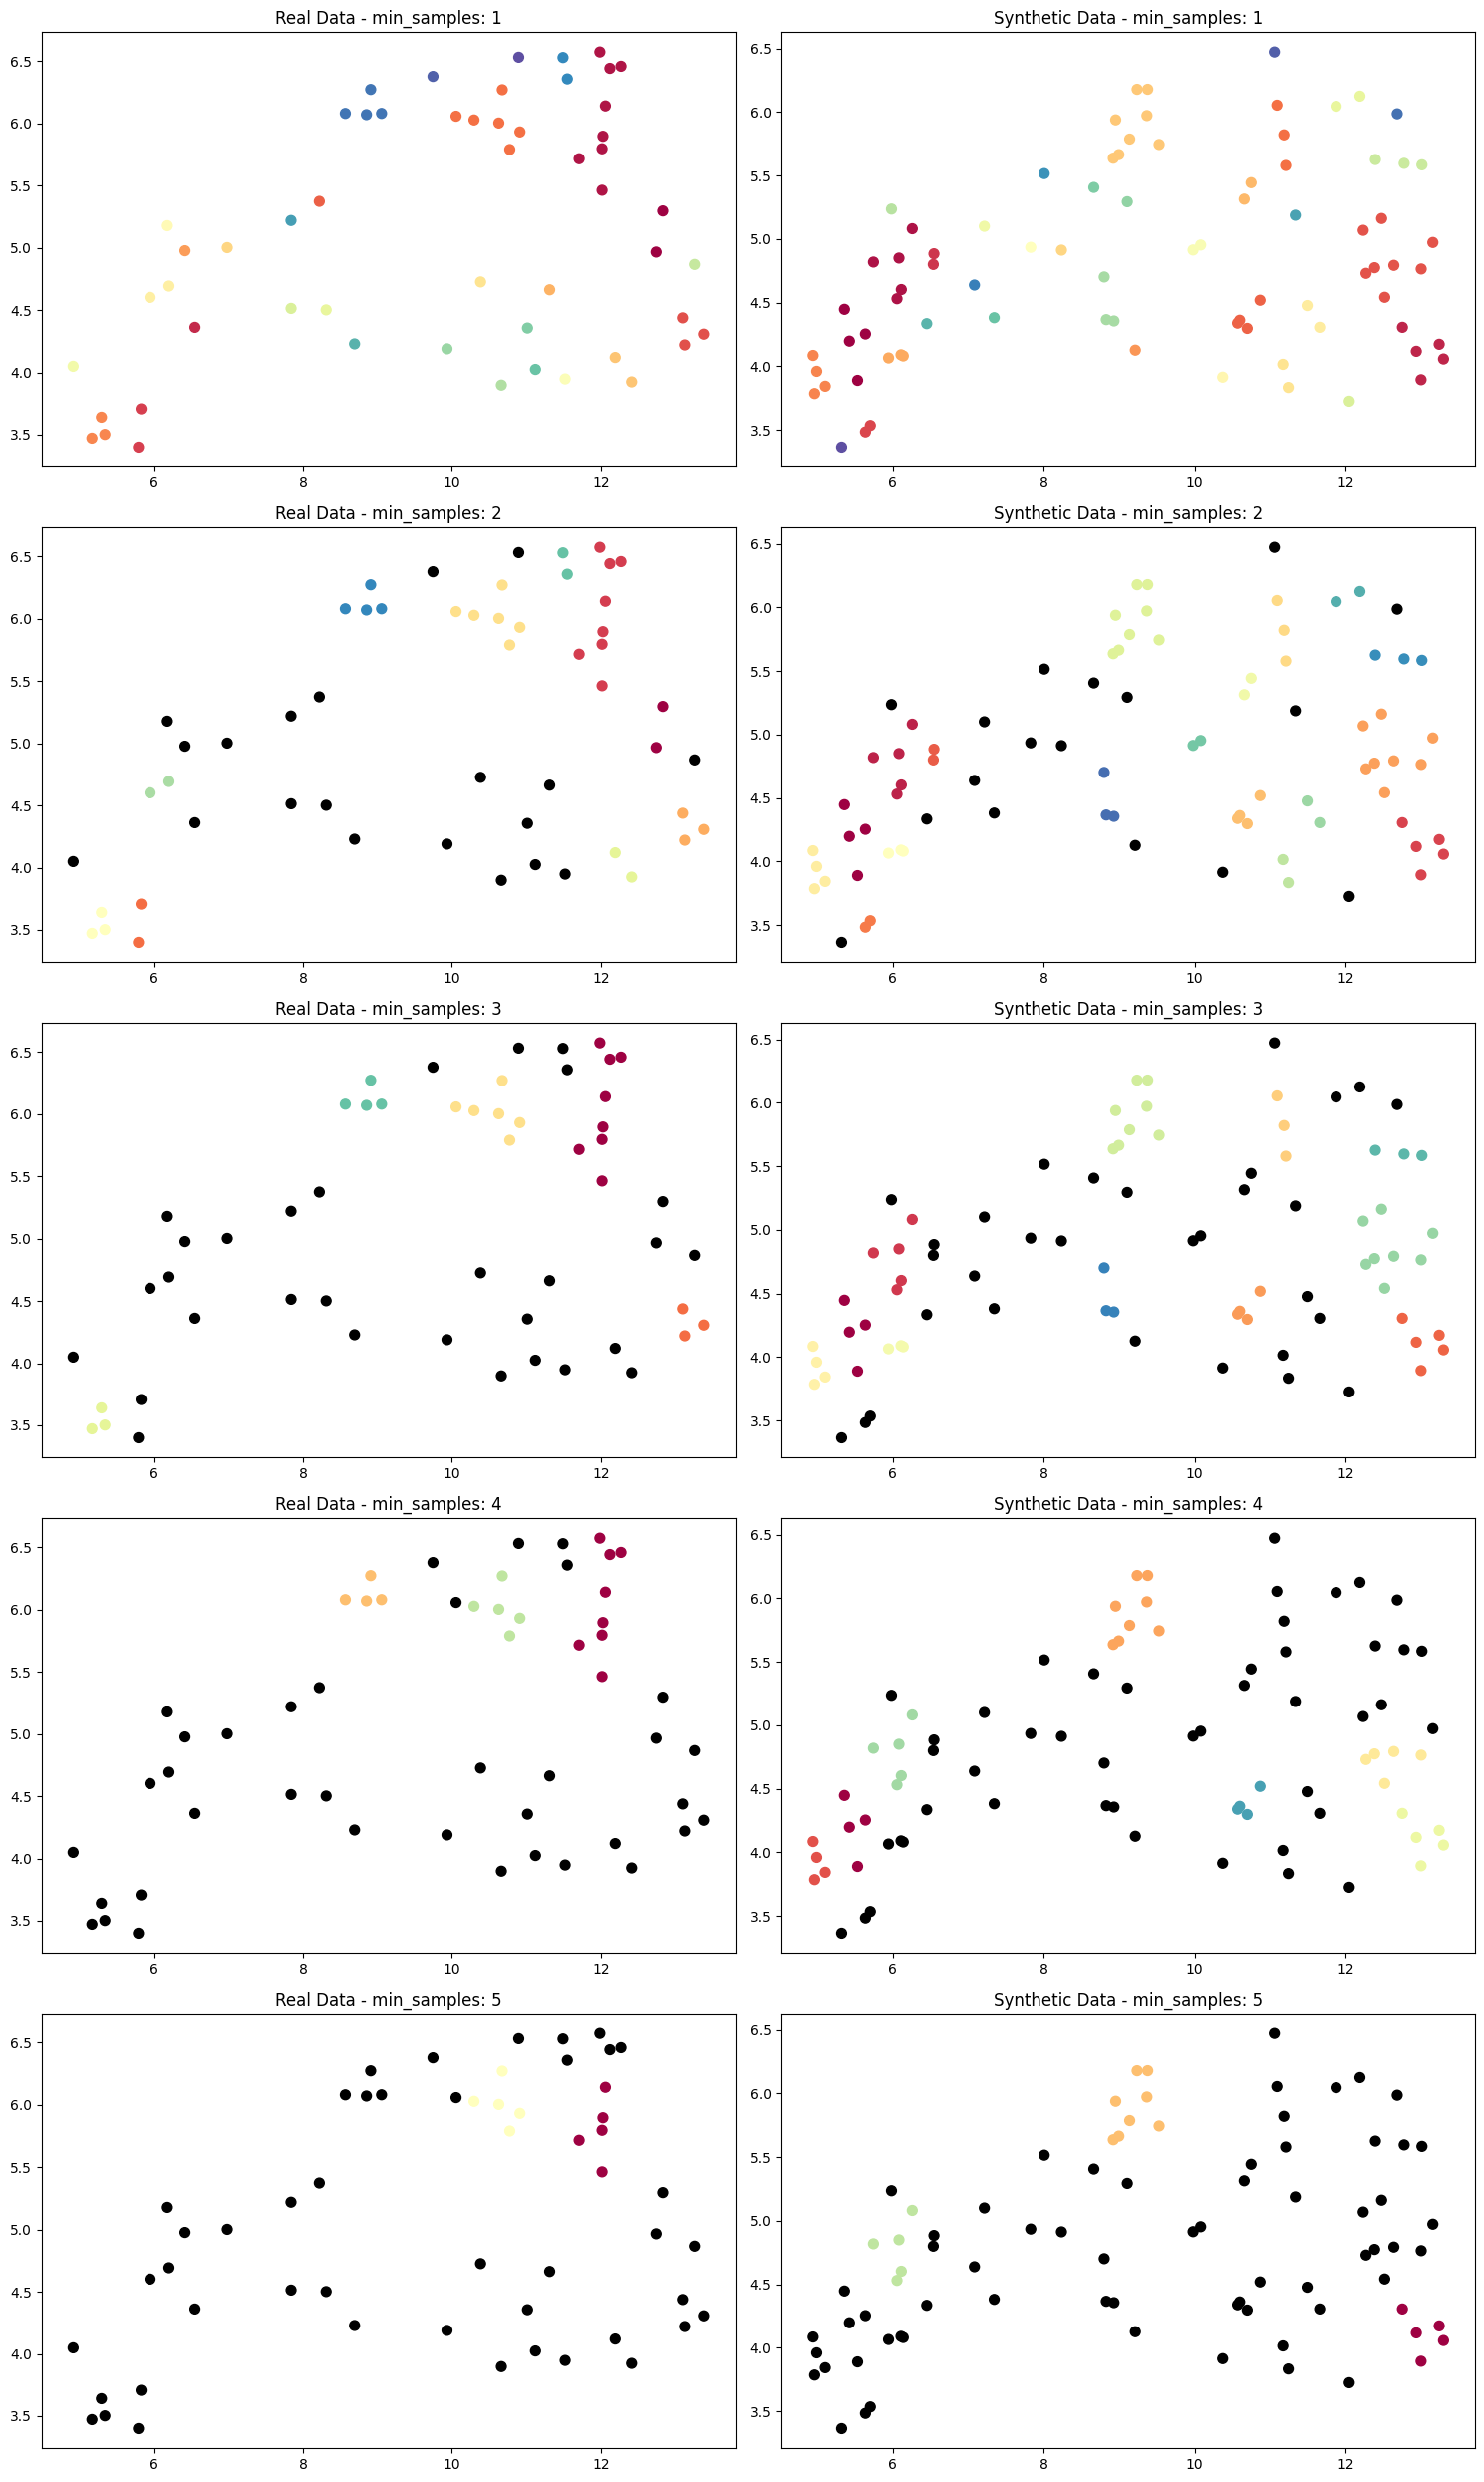

In [11]:
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from umap.umap_ import UMAP
from sklearn.cluster import DBSCAN
import numpy as np

def custom_color_palette(labels):
    """Tworzy niestandardową paletę kolorów dla etykiet klastrów, gdzie szum jest czarny."""
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

    # Przypisanie czarnego koloru do etykiety szumu (-1)
    color_dict = {label: color if label != -1 else (0, 0, 0, 1) for label, color in zip(unique_labels, colors)}
    return [color_dict[label] for label in labels]

def cluster_and_visualize(data, labels, title, ax):
    colors = custom_color_palette(labels)
    ax.scatter(data[:, 0], data[:, 1], c=colors, s=50)
    ax.set_title(title)

# Standaryzacja i PCA (tak samo jak wcześniej)
scaler = StandardScaler()
combined_scaled = scaler.fit_transform(np.vstack((real_data, synthetic_data)))
#pca = PCA(n_components=2)
#combined_pca = pca.fit_transform(combined_scaled)

# Rozdzielenie wyników PCA
#real_pca = combined_pca[:len(real_data), :]
#synthetic_pca = combined_pca[len(real_data):, :]

# UMAP (razem dla obu zestawów danych)
umap = UMAP(n_components=2)
combined_umap = umap.fit_transform(combined_scaled)

# Rozdzielenie wyników UMAP
real_umap = combined_umap[:len(real_data), :]
synthetic_umap = combined_umap[len(real_data):, :]

# Obliczanie odległości do najbliższego sąsiada dla każdego punktu
nearest_neighbors = NearestNeighbors(n_neighbors=2)
neighbors = nearest_neighbors.fit(combined_umap)
distances, indices = neighbors.kneighbors(combined_umap)

# Sortowanie odległości
distances = np.sort(distances[:, 1], axis=0)

# Znajdowanie "łokcia" w wykresie
knee_locator = KneeLocator(range(len(distances)), distances, curve='convex', direction='increasing')

# Wartość eps to odległość w "łokciu"
eps_value = distances[knee_locator.knee]

# Wizualizacja
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.xlabel('Punkty posortowane według odległości')
plt.ylabel('Odległość do najbliższego sąsiada')
plt.axvline(knee_locator.knee, color='r', linestyle='--')
plt.show()

print(f"Zalecana wartość eps: {eps_value}")

# Ustawienia różnych wartości min_samples_value
min_samples_values = [1, 2, 3, 4, 5]

# Grid wizualizacji dla różnych wartości min_samples_value
fig, axs = plt.subplots(len(min_samples_values), 2, figsize=(15, 25)) # Rozmiar siatki wykresów

for i, min_samples_value in enumerate(min_samples_values):
    # DBSCAN dla danych rzeczywistych
    dbscan_real = DBSCAN(eps=eps_value, min_samples=min_samples_value, metric="manhattan").fit(real_umap)
    real_labels = dbscan_real.labels_

    # DBSCAN dla danych syntetycznych
    dbscan_synthetic = DBSCAN(eps=eps_value, min_samples=min_samples_value, metric="manhattan").fit(synthetic_umap)
    synthetic_labels = dbscan_synthetic.labels_

    # Wizualizacja dla danych rzeczywistych i syntetycznych
    cluster_and_visualize(real_umap, real_labels, f'Real Data - min_samples: {min_samples_value}', axs[i, 0])
    cluster_and_visualize(synthetic_umap, synthetic_labels, f'Synthetic Data - min_samples: {min_samples_value}', axs[i, 1])

plt.tight_layout()
plt.show()


### Analiza klastrów i identyfikacja anomalii

C:\Users\Lukasz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lukasz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lukasz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

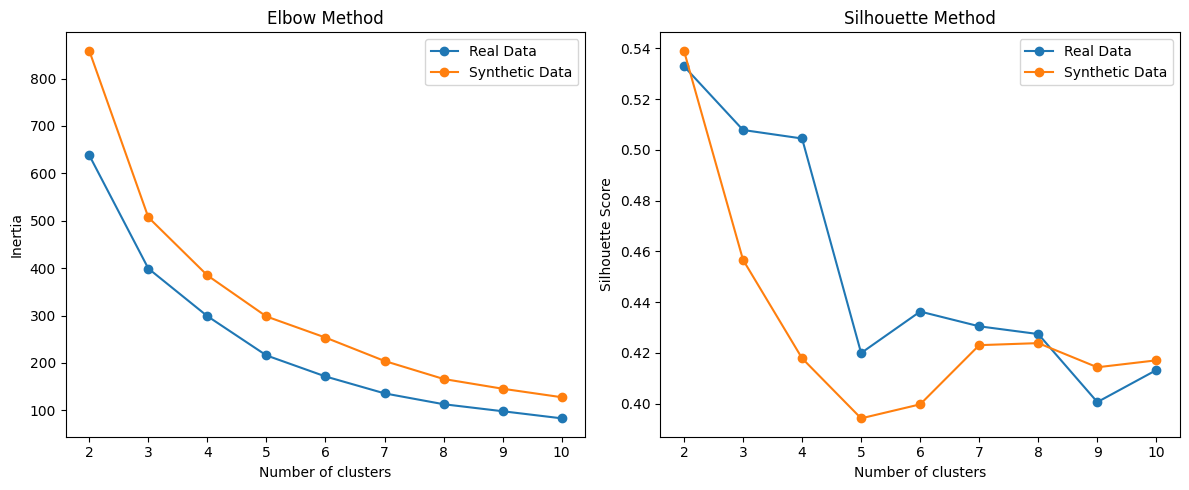

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standaryzacja danych
scaler = StandardScaler()
real_scaled = scaler.fit_transform(real_data)
synthetic_scaled = scaler.transform(synthetic_data)

# PCA do 2 komponentów
pca = PCA(n_components=2)
real_data_2d = pca.fit_transform(real_scaled)
synthetic_data_2d = pca.transform(synthetic_scaled)

def calculate_metrics(data, k_range):
    inertia = []
    silhouette_scores = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))

    return inertia, silhouette_scores

k_range = range(2, 11)  # Sprawdzamy od 2 do 10 klastrów
inertia_real, silhouette_real = calculate_metrics(real_data_2d, k_range)
inertia_synthetic, silhouette_synthetic = calculate_metrics(synthetic_data_2d, k_range)

# Rysowanie wykresu metody łokcia
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_real, '-o', label='Real Data')
plt.plot(k_range, inertia_synthetic, '-o', label='Synthetic Data')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.legend()

# Rysowanie wykresu metody silhouette
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_real, '-o', label='Real Data')
plt.plot(k_range, silhouette_synthetic, '-o', label='Synthetic Data')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\Lukasz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lukasz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lukasz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

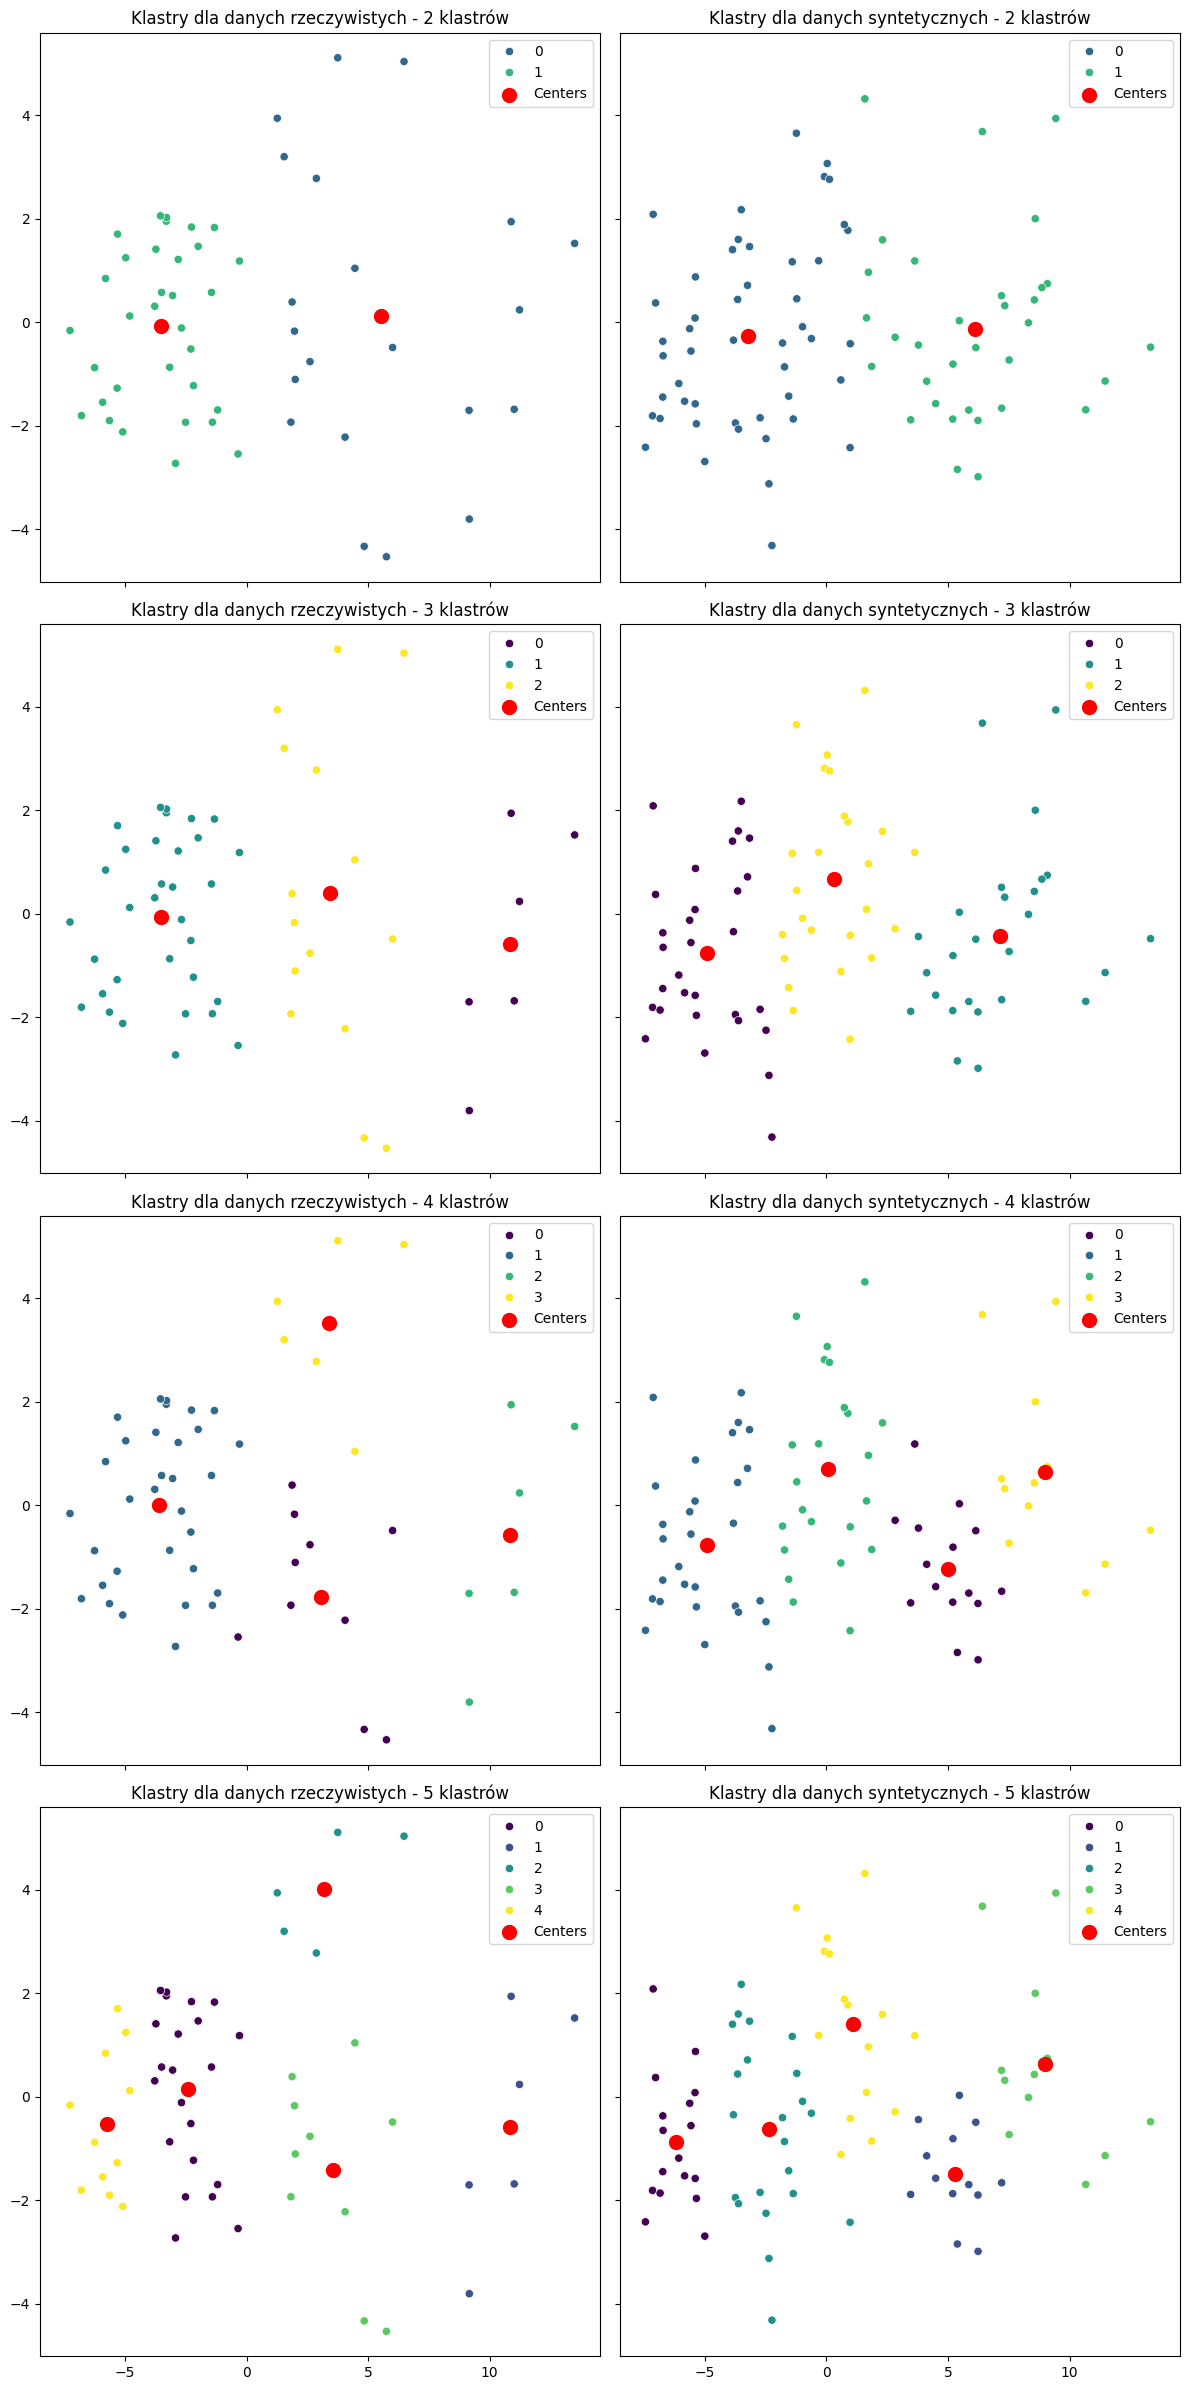

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Załóżmy, że real_data i synthetic_data są już wcześniej zdefiniowanymi DataFrame'ami

# Standaryzacja danych
scaler = StandardScaler()
real_scaled = scaler.fit_transform(real_data)
synthetic_scaled = scaler.transform(synthetic_data)

# PCA do 2 komponentów
pca = PCA(n_components=2)
real_data_2d = pca.fit_transform(real_scaled)
synthetic_data_2d = pca.transform(synthetic_scaled)

# Liczba klastrów do przetestowania
cluster_numbers = [2, 3, 4, 5]

# Utworzenie figury z gridem 4x2
fig, axs = plt.subplots(4, 2, figsize=(12, 24), sharex=True, sharey=True)

for i, n_clusters in enumerate(cluster_numbers):
    # Dopasowanie K-means do danych rzeczywistych
    kmeans_real = KMeans(n_clusters=n_clusters, random_state=42)
    real_clusters = kmeans_real.fit_predict(real_data_2d)

    # Dopasowanie K-means do danych syntetycznych
    kmeans_synthetic = KMeans(n_clusters=n_clusters, random_state=42)
    synthetic_clusters = kmeans_synthetic.fit_predict(synthetic_data_2d)

    # Wizualizacja dla danych rzeczywistych
    sns.scatterplot(x=real_data_2d[:, 0], y=real_data_2d[:, 1], hue=real_clusters, palette='viridis', ax=axs[i, 0])
    axs[i, 0].scatter(kmeans_real.cluster_centers_[:, 0], kmeans_real.cluster_centers_[:, 1], s=100, c='red', label='Centers')
    axs[i, 0].set_title(f'Klastry dla danych rzeczywistych - {n_clusters} klastrów')
    axs[i, 0].legend()
    # Wizualizacja dla danych syntetycznych
    sns.scatterplot(x=synthetic_data_2d[:, 0], y=synthetic_data_2d[:, 1], hue=synthetic_clusters, palette='viridis', ax=axs[i, 1])
    axs[i, 1].scatter(kmeans_synthetic.cluster_centers_[:, 0], kmeans_synthetic.cluster_centers_[:, 1], s=100, c='red', label='Centers')
    axs[i, 1].set_title(f'Klastry dla danych syntetycznych - {n_clusters} klastrów')
    axs[i, 1].legend()

plt.tight_layout()
plt.show()

### Wykorzystanie HDBSCAN do wizualizacji różnorodności danych

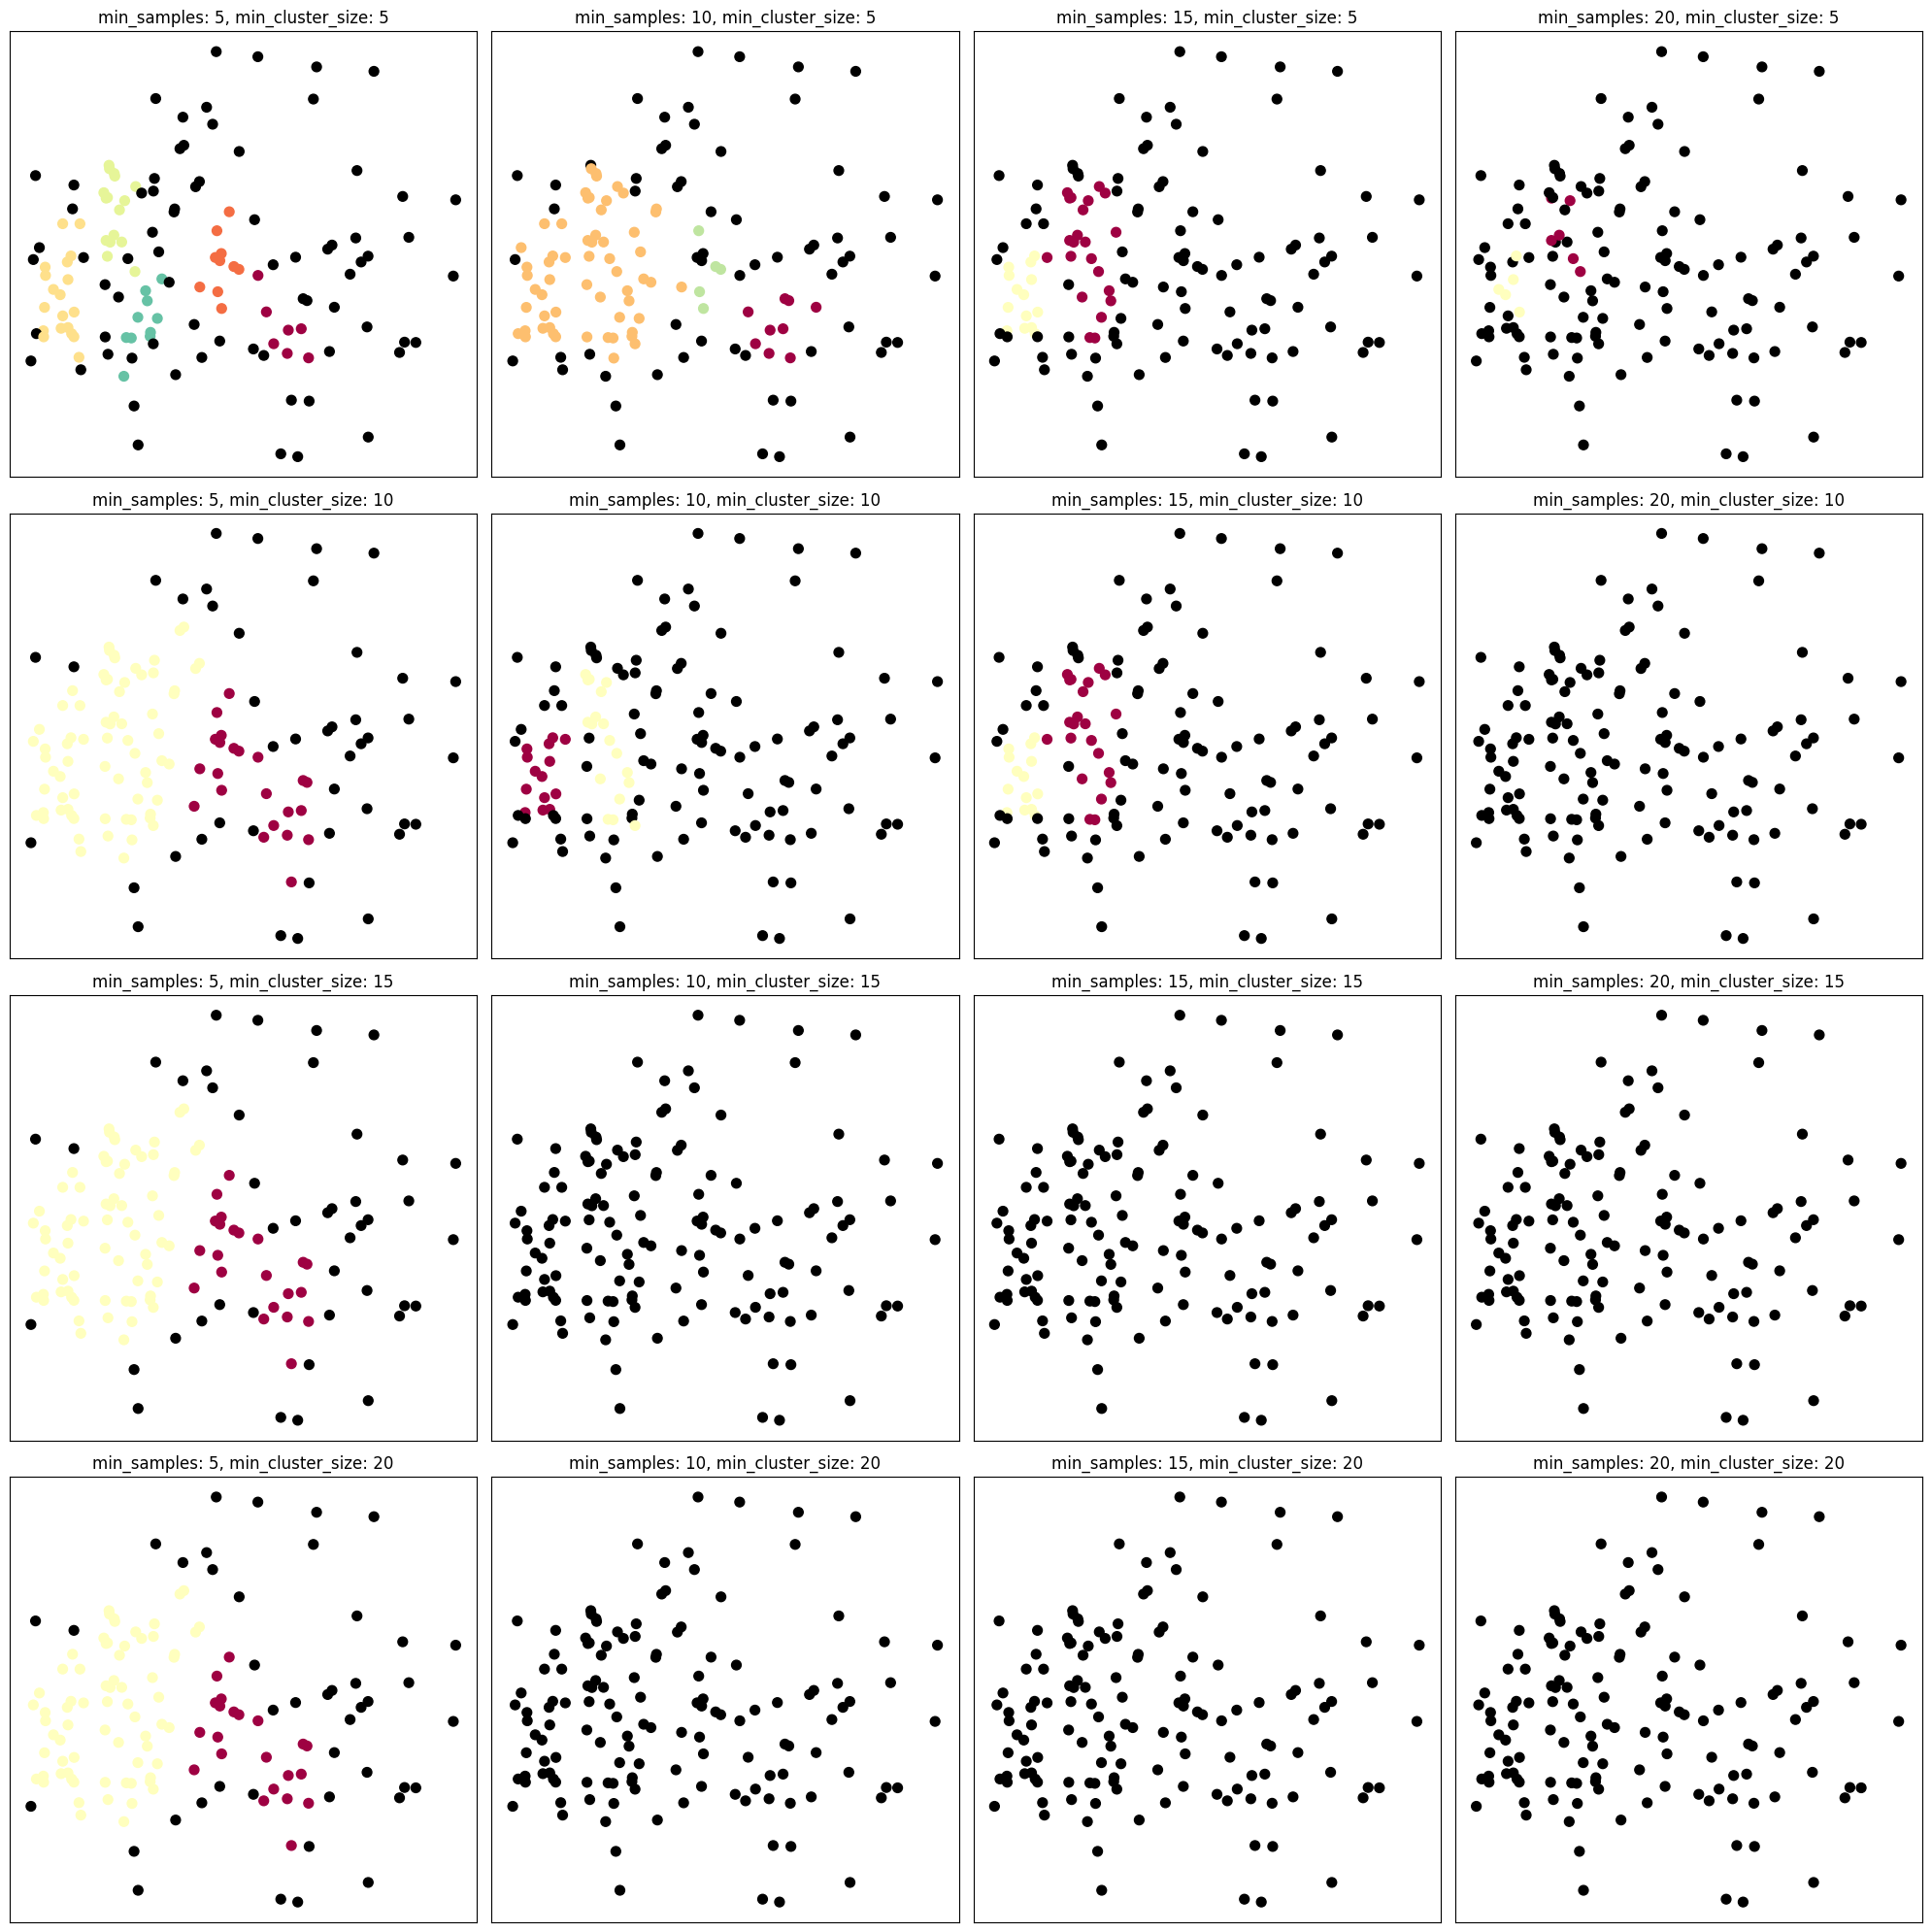

In [14]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from hdbscan import HDBSCAN
import numpy as np

def custom_color_palette(labels):
    """Tworzy niestandardową paletę kolorów dla etykiet klastrów, gdzie szum jest czarny."""
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

    # Przypisanie czarnego koloru do etykiety szumu (-1)
    color_dict = {label: color if label != -1 else (0, 0, 0, 1) for label, color in zip(unique_labels, colors)}
    return [color_dict[label] for label in labels]

# Standaryzacja i PCA
scaler = StandardScaler()
combined_scaled = scaler.fit_transform(np.vstack((real_data, synthetic_data)))
pca = PCA(n_components=2)
combined_pca = pca.fit_transform(combined_scaled)

# Parametry do eksperymentowania
min_cluster_sizes = [5, 10, 15, 20]
min_samples_list = [5, 10, 15, 20]

# Utworzenie figury z gridem
fig, axs = plt.subplots(len(min_cluster_sizes), len(min_samples_list), figsize=(20, 20), sharex=True, sharey=True)

for i, min_cluster_size in enumerate(min_cluster_sizes):
    for j, min_samples in enumerate(min_samples_list):
        # HDBSCAN
        hdbscan = HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size)
        labels = hdbscan.fit_predict(combined_pca)

        # Niemożliwe kolory do mapy kolorów
        colors = custom_color_palette(labels)

        # Wizualizacja
        axs[i, j].scatter(combined_pca[:, 0], combined_pca[:, 1], c=colors, s=50)
        axs[i, j].set_title(f'min_samples: {min_samples}, min_cluster_size: {min_cluster_size}')
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])

plt.tight_layout()
plt.show()


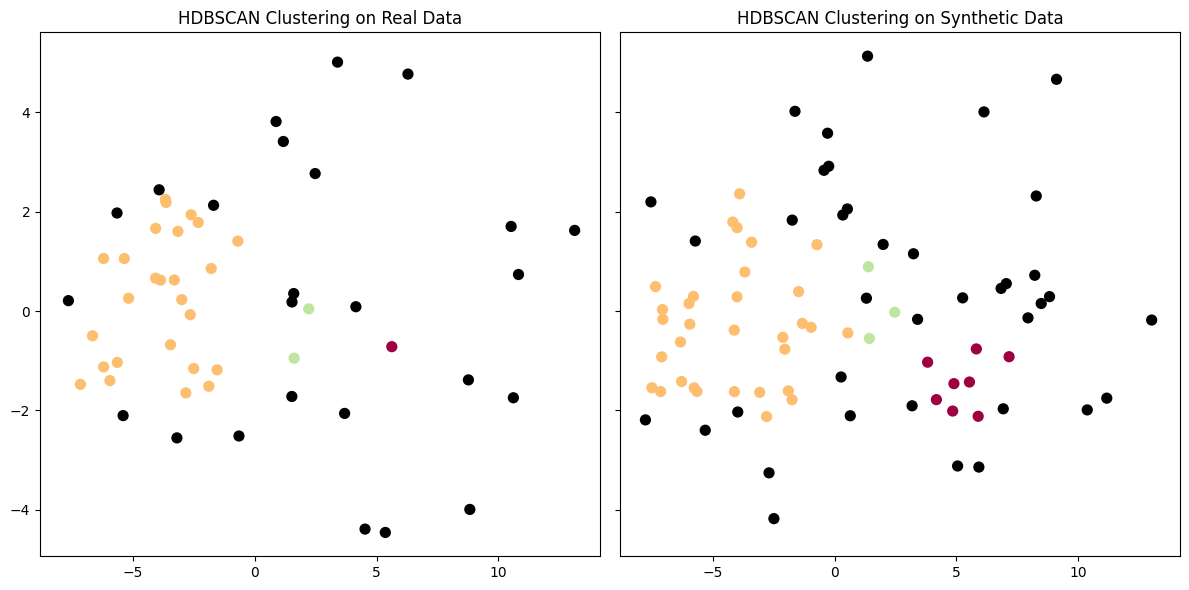

In [15]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from hdbscan import HDBSCAN
import numpy as np

def custom_color_palette(labels):
    """Tworzy niestandardową paletę kolorów dla etykiet klastrów, gdzie szum jest czarny."""
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

    # Przypisanie czarnego koloru do etykiety szumu (-1)
    color_dict = {label: color if label != -1 else (0, 0, 0, 1) for label, color in zip(unique_labels, colors)}
    return [color_dict[label] for label in labels]

def hdbscan_visualization(combined_pca, n_points):
    # HDBSCAN
    hdbscan = HDBSCAN(min_samples=10, min_cluster_size=5)
    combined_hdbscan = hdbscan.fit_predict(combined_pca)

    # Oddzielenie wyników HDBSCAN
    real_hdbscan = combined_hdbscan[:n_points]
    synthetic_hdbscan = combined_hdbscan[n_points:]

    # Niemożliwe kolory do mapy kolorów
    real_colors = custom_color_palette(real_hdbscan)
    synthetic_colors = custom_color_palette(synthetic_hdbscan)

    # Wizualizacja
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

    axs[0].scatter(combined_pca[:n_points, 0], combined_pca[:n_points, 1], c=real_colors, s=50)
    axs[0].set_title('HDBSCAN Clustering on Real Data')

    axs[1].scatter(combined_pca[n_points:, 0], combined_pca[n_points:, 1], c=synthetic_colors, s=50)
    axs[1].set_title('HDBSCAN Clustering on Synthetic Data')

    plt.tight_layout()
    plt.show()

# Standaryzacja danych
scaler = StandardScaler()
combined_scaled = scaler.fit_transform(np.vstack((real_data, synthetic_data)))

# PCA do 2 komponentów
pca = PCA(n_components=2)
combined_pca = pca.fit_transform(combined_scaled)

# Wywołanie funkcji wizualizacji
hdbscan_visualization(combined_pca, len(real_data))


### Wykorzsyanie ICA

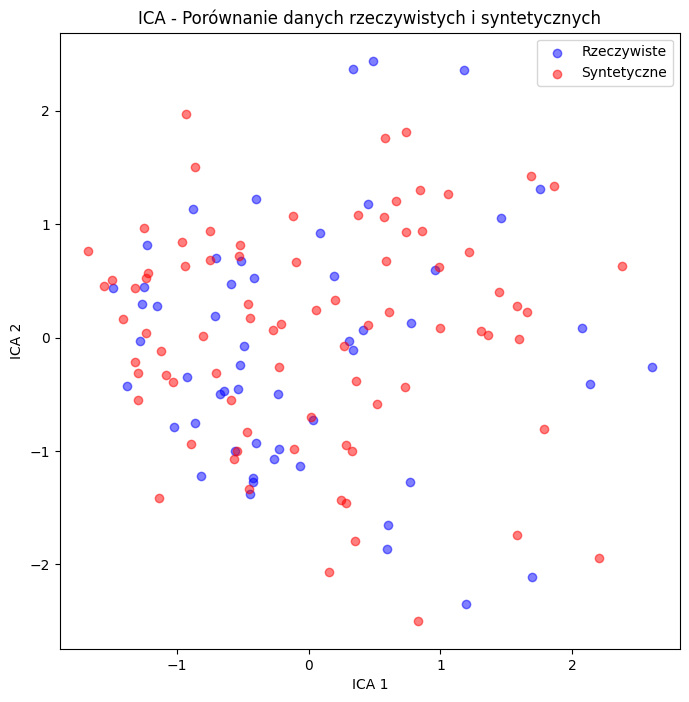

In [16]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA
import numpy as np

def ica_visualization(combined_ica, n_points):
    # Oddzielenie wyników ICA
    real_ica = combined_ica[:n_points, :]
    synthetic_ica = combined_ica[n_points:, :]

    # Wizualizacja
    plt.figure(figsize=(8, 8))
    plt.scatter(real_ica[:, 0], real_ica[:, 1], c='blue', alpha=0.5, label='Rzeczywiste')
    plt.scatter(synthetic_ica[:, 0], synthetic_ica[:, 1], c='red', alpha=0.5, label='Syntetyczne')
    plt.legend()
    plt.title('ICA - Porównanie danych rzeczywistych i syntetycznych')
    plt.xlabel('ICA 1')
    plt.ylabel('ICA 2')
    plt.show()

# Standaryzacja danych
scaler = StandardScaler()
combined_scaled = scaler.fit_transform(np.vstack((real_data, synthetic_data)))

# ICA do 2 komponentów
ica = FastICA(n_components=2, random_state=42)
combined_ica = ica.fit_transform(combined_scaled)

# Wywołanie funkcji wizualizacji
ica_visualization(combined_ica, len(real_data))


### Wykorzystanie MDS do wizualizacji różnorodności danych

C:\Users\Lukasz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Stress value: 36409.02863042439


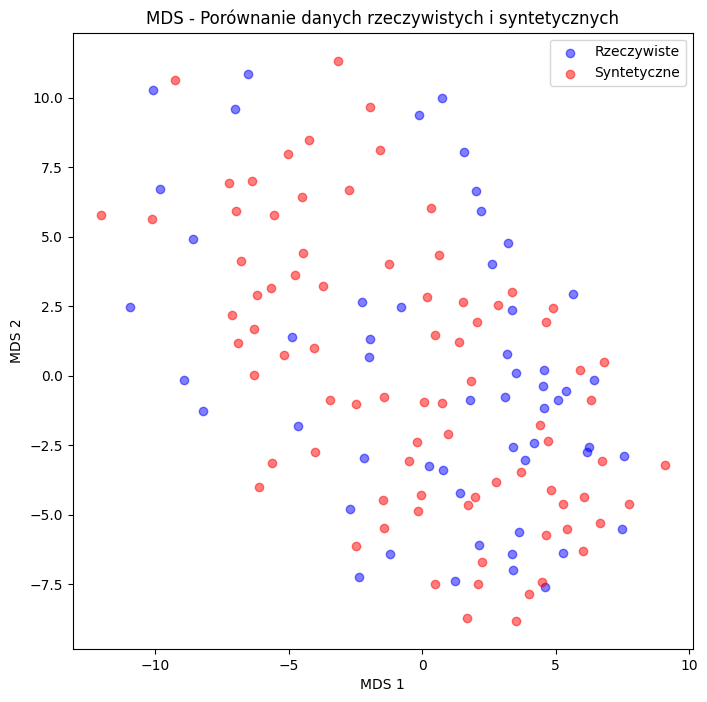

In [17]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
import numpy as np

def mds_visualization(combined_mds, n_points):
    # Oddzielenie wyników MDS
    real_mds = combined_mds[:n_points, :]
    synthetic_mds = combined_mds[n_points:, :]

    # Wizualizacja
    plt.figure(figsize=(8, 8))
    plt.scatter(real_mds[:, 0], real_mds[:, 1], c='blue', alpha=0.5, label='Rzeczywiste')
    plt.scatter(synthetic_mds[:, 0], synthetic_mds[:, 1], c='red', alpha=0.5, label='Syntetyczne')
    plt.legend()
    plt.title('MDS - Porównanie danych rzeczywistych i syntetycznych')
    plt.xlabel('MDS 1')
    plt.ylabel('MDS 2')
    plt.show()

# Standaryzacja danych
scaler = StandardScaler()
combined_scaled = scaler.fit_transform(np.vstack((real_data, synthetic_data)))

# MDS do 2 komponentów
mds = MDS(n_components=2)
combined_mds = mds.fit_transform(combined_scaled)

stress_value = mds.stress_
print(f"Stress value: {stress_value}")

# Wywołanie funkcji wizualizacji
mds_visualization(combined_mds, len(real_data))


### wykorzystanie testu Mann-Whitneya

Liczba istotnych kolumn po korekcie Benjamini-Hochberga: 0 / 50


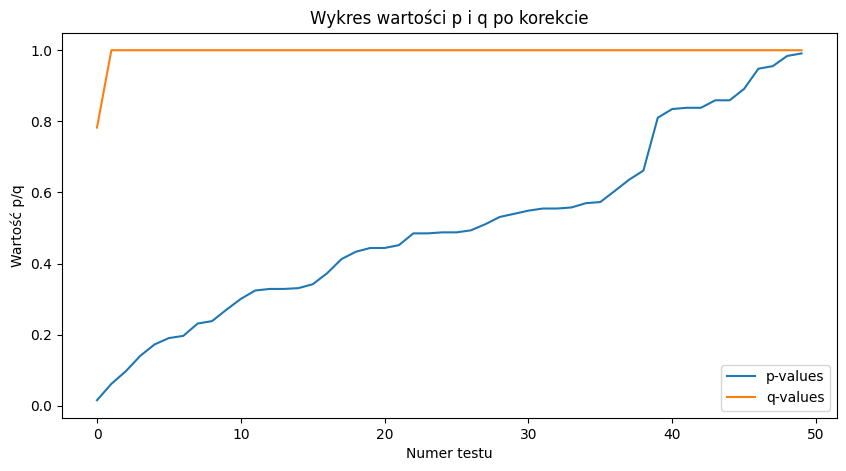

In [18]:
from scipy.stats import mannwhitneyu
import numpy as np

def mann_whitney_test(real_data, synthetic_data):
    p_values = []
    for column in real_data.columns:
        p_values.append(mannwhitneyu(real_data[column], synthetic_data[column])[1])
    return p_values



p_values = mann_whitney_test(real_data, synthetic_data)

# Implementacja korekty Benjamini-Hochberga
p_values_sorted = np.array(sorted(p_values))
m = len(p_values_sorted) # Liczba testów
q_values = np.empty(m)
prev_bh_value = 0

for i, p in enumerate(p_values_sorted):
    bh_value = p * m / (i + 1)
    # Ograniczenie wartości q do 1
    bh_value = min(bh_value, 1)
    # Zapewnienie, że q-values są niemalejące
    bh_value = max(prev_bh_value, bh_value)
    q_values[i] = bh_value
    prev_bh_value = bh_value

# Teraz powinniśmy zastosować kolejną korektę, aby wartości q były niemalejące
# od końca do początku
for i in range(m-2, -1, -1):
    q_values[i] = min(q_values[i], q_values[i+1])

significant_count = np.sum(q_values < 0.05)
print(f"Liczba istotnych kolumn po korekcie Benjamini-Hochberga: {significant_count} / {m}")

plt.figure(figsize=(10, 5))
plt.plot(p_values_sorted, label='p-values')
plt.plot(q_values, label='q-values')
plt.xlabel('Numer testu')
plt.ylabel('Wartość p/q')
plt.title('Wykres wartości p i q po korekcie')
plt.legend()
plt.show()

### Wykorzystanie hierarchicznego klastrowania

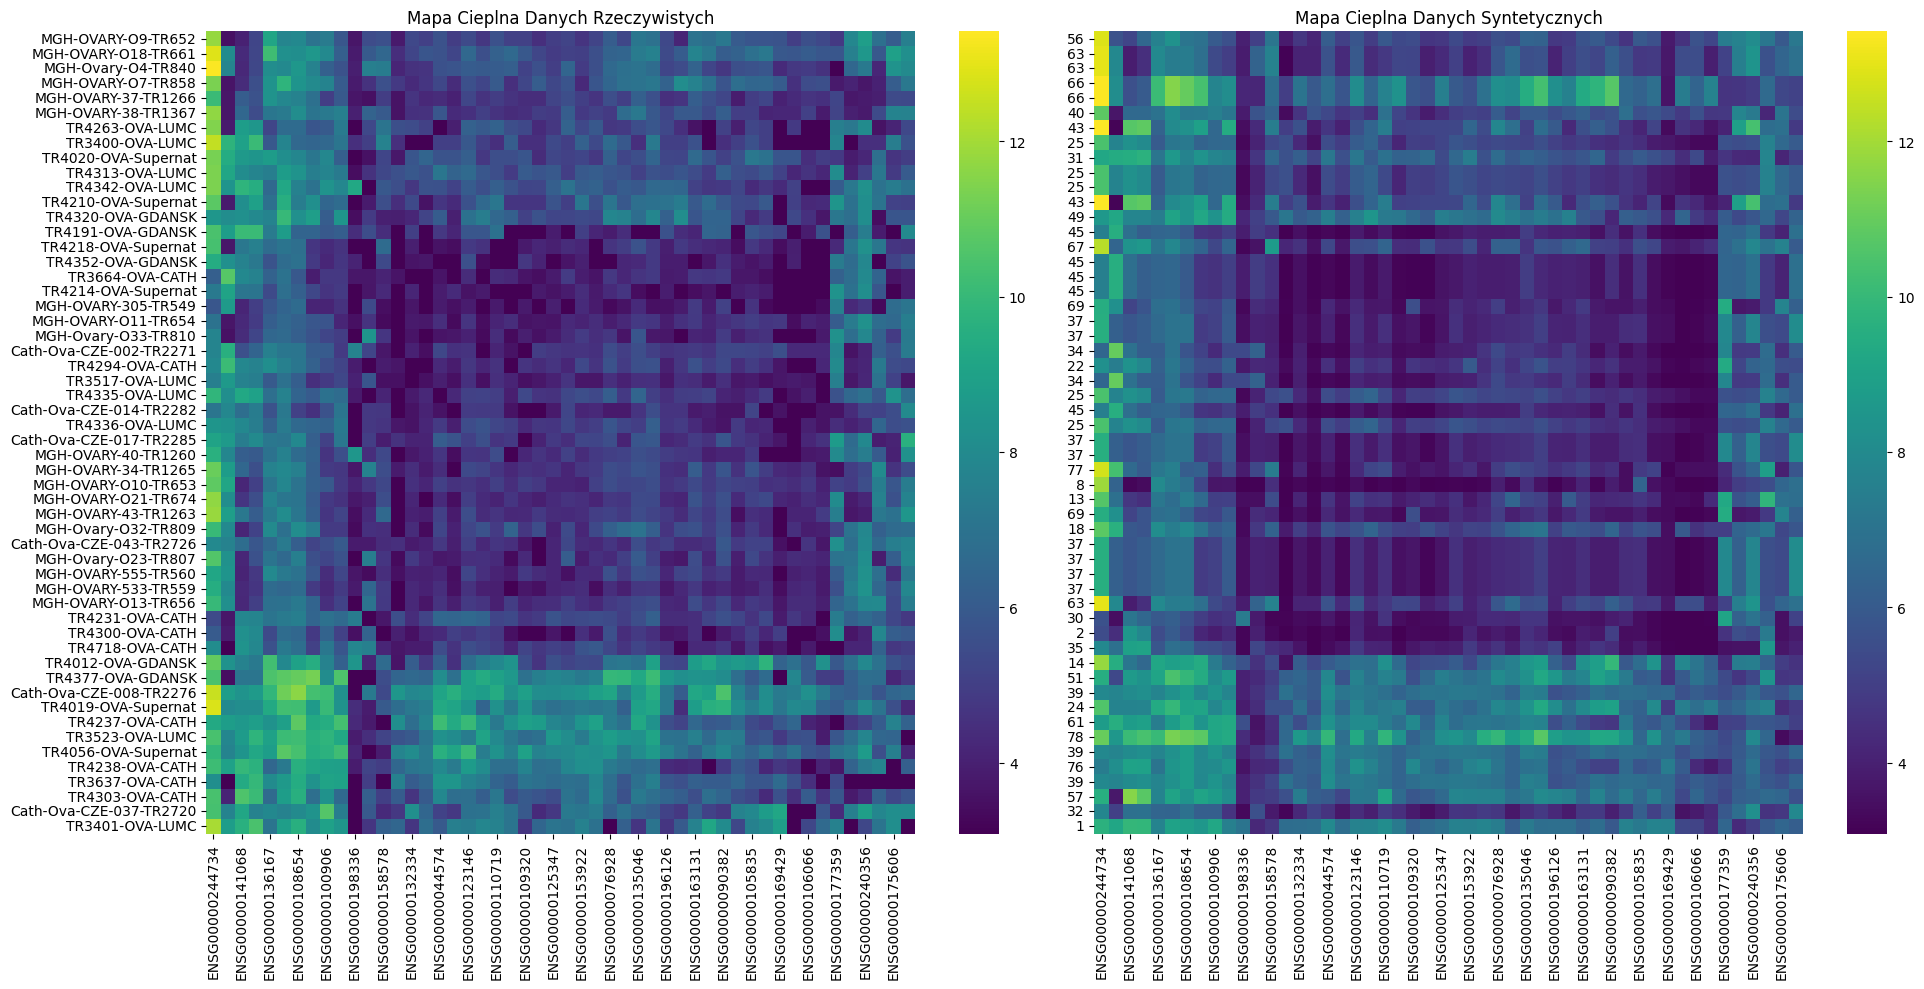

In [19]:
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import pdist

def hierarchical_clustering(data, use_cols=True):
    if use_cols:
        linkage_matrix = linkage(pdist(data.T), method='average')
        order = leaves_list(linkage_matrix)
        return data.iloc[:, order]
    else:
        linkage_matrix = linkage(pdist(data), method='average')
        order = leaves_list(linkage_matrix)
        return data.iloc[order, :]

def sort_synthetic_data(real_data, synthetic_data, col_order):
    # Sortowanie danych rzeczywistych i syntetycznych według col_order
    real_sorted = real_data[col_order]
    synthetic_sorted = synthetic_data[col_order]

    # Inicjalizacja macierzy do przechowywania wyników korelacji
    correlations_matrix = np.zeros((real_sorted.shape[0], synthetic_sorted.shape[0]))

    # Obliczanie korelacji dla każdej pary wierszy
    for i in range(real_sorted.shape[0]):
        for j in range(synthetic_sorted.shape[0]):
            correlations_matrix[i, j] = np.corrcoef(real_sorted.iloc[i, :], synthetic_sorted.iloc[j, :])[0, 1]

    # Znajdowanie indeksów wierszy danych syntetycznych o najwyższej korelacji
    synthetic_order = np.argmax(correlations_matrix, axis=1)
    
    return synthetic_sorted.iloc[synthetic_order, :]

# Grupowanie kolumn (genów) przy użyciu danych rzeczywistych
col_order = hierarchical_clustering(real_data, use_cols=True).columns

# Stosowanie tej samej kolejności kolumn do obu zestawów danych
clustered_real_data = hierarchical_clustering(real_data, use_cols=False)[col_order]
clustered_synthetic_data = hierarchical_clustering(synthetic_data, use_cols=False)[col_order]

# Sortowanie danych syntetycznych na podstawie korelacji
sorted_synthetic_data = sort_synthetic_data(clustered_real_data, clustered_synthetic_data, col_order)

# Znalezienie wspólnych wartości min i max dla obu zestawów danych
vmin = min(clustered_real_data.min().min(), sorted_synthetic_data.min().min())
vmax = max(clustered_real_data.max().max(), sorted_synthetic_data.max().max())

# Tworzenie map cieplnych z użyciem wspólnej skali kolorów
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

sns.heatmap(clustered_real_data, ax=axs[0], cmap='viridis', cbar=True, vmin=vmin, vmax=vmax)
axs[0].set_title('Mapa Cieplna Danych Rzeczywistych')

sns.heatmap(sorted_synthetic_data, ax=axs[1], cmap='viridis', cbar=True, vmin=vmin, vmax=vmax)
axs[1].set_title('Mapa Cieplna Danych Syntetycznych')

plt.tight_layout()
plt.show()


### Wykorzystanie klasyfikatorów

In [20]:
# klasyfikacja z uyciem svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


def svm_classification(real_data, synthetic_data):
    # Połączenie danych rzeczywistych i syntetycznych
    combined_data = np.vstack((real_data, synthetic_data))

    # Normalizacja danych
    scaler = StandardScaler()
    combined_data = scaler.fit_transform(combined_data)

    # Stworzenie etykiet
    labels = np.hstack((np.ones(len(real_data)), np.zeros(len(synthetic_data))))

    # Podział na zbiór treningowy i testowy
    X_train, X_test, y_train, y_test = train_test_split(combined_data, labels, test_size=0.4, random_state=42)

    # Klasyfikacja przy użyciu SVM
    svm = SVC(kernel='linear', random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    # Wypisanie dokładności i innych metryk
    print(f"Dokładność: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))


svm_classification(real_data, synthetic_data)

Dokładność: 0.5925925925925926
              precision    recall  f1-score   support

         0.0       0.59      0.83      0.69        29
         1.0       0.62      0.32      0.42        25

    accuracy                           0.59        54
   macro avg       0.60      0.57      0.55        54
weighted avg       0.60      0.59      0.56        54

[[24  5]
 [17  8]]


In [21]:
from sklearn.tree import DecisionTreeClassifier
# klasyfikacja z uyciem random forest
def decision_tree_classification(real_data, synthetic_data):
    # Połączenie danych rzeczywistych i syntetycznych
    combined_data = np.vstack((real_data, synthetic_data))

    # Normalizacja danych
    scaler = StandardScaler()
    combined_data = scaler.fit_transform(combined_data)

    # Stworzenie etykiet
    labels = np.hstack((np.ones(len(real_data)), np.zeros(len(synthetic_data))))

    # Podział na zbiór treningowy i testowy
    X_train, X_test, y_train, y_test = train_test_split(combined_data, labels, test_size=0.4, random_state=42)

    # Klasyfikacja
    dt = DecisionTreeClassifier(max_depth=5, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)

    # Wypisanie dokładności i innych metryk
    print(f"Dokładność: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

decision_tree_classification(real_data, synthetic_data)

Dokładność: 0.7777777777777778
              precision    recall  f1-score   support

         0.0       0.73      0.93      0.82        29
         1.0       0.88      0.60      0.71        25

    accuracy                           0.78        54
   macro avg       0.81      0.77      0.77        54
weighted avg       0.80      0.78      0.77        54

[[27  2]
 [10 15]]


In [22]:
from sklearn.ensemble import RandomForestClassifier
# klasyfikacja z uyciem random forest
def random_forest_classification(real_data, synthetic_data):
    # Połączenie danych rzeczywistych i syntetycznych
    combined_data = np.vstack((real_data, synthetic_data))

    # Normalizacja danych
    scaler = StandardScaler()
    combined_data = scaler.fit_transform(combined_data)

    # Stworzenie etykiet
    labels = np.hstack((np.ones(len(real_data)), np.zeros(len(synthetic_data))))

    # Podział na zbiór treningowy i testowy
    X_train, X_test, y_train, y_test = train_test_split(combined_data, labels, test_size=0.4, random_state=42)

    # Klasyfikacja
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    # Wypisanie dokładności i innych metryk
    print(f"Dokładność: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

random_forest_classification(real_data, synthetic_data)

Dokładność: 0.8333333333333334
              precision    recall  f1-score   support

         0.0       0.78      0.97      0.86        29
         1.0       0.94      0.68      0.79        25

    accuracy                           0.83        54
   macro avg       0.86      0.82      0.83        54
weighted avg       0.85      0.83      0.83        54

[[28  1]
 [ 8 17]]


In [23]:
from xgboost import XGBClassifier

# klasyfikacja z uyciem xgboost
def xgboost_classification(real_data, synthetic_data):
    # Połączenie danych rzeczywistych i syntetycznych
    combined_data = np.vstack((real_data, synthetic_data))
    
    # Normalizacja danych
    scaler = StandardScaler()
    combined_data = scaler.fit_transform(combined_data)

    # Stworzenie etykiet
    labels = np.hstack((np.ones(len(real_data)), np.zeros(len(synthetic_data))))

    # Podział na zbiór treningowy i testowy
    X_train, X_test, y_train, y_test = train_test_split(combined_data, labels, test_size=0.4, random_state=42)

    # Klasyfikacja
    xgb = XGBClassifier(random_state=42)
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)

    # Wypisanie dokładności i innych metryk
    print(f"Dokładność: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

xgboost_classification(real_data, synthetic_data)   

Dokładność: 0.6851851851851852
              precision    recall  f1-score   support

         0.0       0.65      0.90      0.75        29
         1.0       0.79      0.44      0.56        25

    accuracy                           0.69        54
   macro avg       0.72      0.67      0.66        54
weighted avg       0.71      0.69      0.67        54

[[26  3]
 [14 11]]


In [24]:
from sklearn.neural_network import MLPClassifier

# klasyfikacja z uzyciem sieci neuronowych

def nn_classification(real_data, synthetic_data):
    # Połączenie danych rzeczywistych i syntetycznych
    combined_data = np.vstack((real_data, synthetic_data))

    # Normalizacja danych
    scaler = StandardScaler()
    combined_data = scaler.fit_transform(combined_data)

    # Stworzenie etykiet
    labels = np.hstack((np.ones(len(real_data)), np.zeros(len(synthetic_data))))

    # Podział na zbiór treningowy i testowy
    X_train, X_test, y_train, y_test = train_test_split(combined_data, labels, test_size=0.4, random_state=42)

    # Klasyfikacja
    nn = MLPClassifier(hidden_layer_sizes=(100,100), random_state=42)
    nn.fit(X_train, y_train)
    y_pred = nn.predict(X_test)

    # Wypisanie dokładności i innych metryk
    print(f"Dokładność: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

nn_classification(real_data, synthetic_data)

Dokładność: 0.5555555555555556
              precision    recall  f1-score   support

         0.0       0.56      0.79      0.66        29
         1.0       0.54      0.28      0.37        25

    accuracy                           0.56        54
   macro avg       0.55      0.54      0.51        54
weighted avg       0.55      0.56      0.52        54

[[23  6]
 [18  7]]
